<a href="https://colab.research.google.com/github/Juliaan20/Juliaan20/blob/main/Taller_lab_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clasificación desempeño del estudiante (datos sin Indicador de Logro)

El modelo predice la calificación final del estudiante a partir de un algoritmo de clasificación, el umbral de desempeño es:

- 0 - Bajo desempeño  (calificación entre 0.0 y 2.9)
- 1 - Medio desempeño (calificación entre 3.0 y 4.0)
- 2 - Alto desempeño  (calificación entre 4.1 y 5.0)

#### Tareas

- Generar el balanceo de los datos.
- Seleccionar las mejores características.
- Dividir los datos en 80% para entrenamiento y 20% para pruebas
- Aplicar hiperparámetros (gridsearch) a los algoritmos: Naive Bayes (NB), SVM, Árbol de decisión (DT) y Bosque Aleatorio (RF).
- Entrenar los modelos con las mejores características.
- Obtener las métricas: matriz de confusión, accuracy, precisión, recall y f1 score.
- Crear una lista con los resultados f1 score obtenidos para los 4 algoritmos.
- Generar una gráfica de barras para identificar cúal fue el algoritmo que obtuvo los mejores resultados.

#### Diccionario de datos

| Variable                  | Tipo             | Descripción |
|---------------------------|------------------|-------------|
| lab_1                     | numérico decimal | Calificación del laboratorio 1 |
| tiempo_entrega_lab_1      | numérico decimal | Tiempo de entrega del laboratorio 1 (horas) |
| intentos_lab_1            | numérico entero  | Total de intentos del laboratorio 1 |
| resultado_lab_1           | numérico entero  | Resultado de INGInious para el laboratorio 1 (0- No presentó; 1- Failed ; 2- Overflow ; 3- Success) |
| lab_2                     | numérico decimal | Calificación del laboratorio 2 |
| lab_3                     | numérico decimal | Calificación del laboratorio 3 |
| grade                     | numérico entero  | Calificación final (0- Bajo desempeño; 1- Medio desempeño; 2- Alto desempeño) |

#### Se importan las librerias

In [118]:
# Se importan las librerias
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as preprocessing

##### INSERTE SU CÓDIGO AQUÍ #####
# Modelos Clasificación: Naive Bayes (NB), SVM, Árboles de Decisión (DT), Bosque Aleatorio (RF) 
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Libreria para SVM
from sklearn.svm import SVC

# Libreria para árboles de decisión
from sklearn import tree

# Libreria para Bosque Aleatorio
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Libreria para el resample 
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier

# Mejores características - Eli5
! pip install Eli5
from eli5 import show_weights

# Libreria para dividir los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split

# Genera la matriz de confusión
from sklearn.metrics import confusion_matrix

# Genera el reporte de la clasificación
from sklearn.metrics import classification_report

# Librerias para métricas del modelo
from sklearn.metrics import precision_score, recall_score, f1_score

# Libreria para calcular la media y la desviación estándar utilizadas en las características
from sklearn.preprocessing import StandardScaler

# Libreria de búsqueda en cuadrícula
from  sklearn.model_selection import GridSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')


#libreria maquina soporte vectorial 
from sklearn import svm

##### FIN CÓDIGO INSERTADO #####

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Se cargan los datos al dataframe

In [87]:
# Se cargan los registros en un DataFrame 
data = pd.read_csv("/content/student_performance.csv", sep=";")

data

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
0,4.4,0.63,2,3,4.4,4.9,2
1,3.3,0.33,1,3,3.3,3.7,1
2,4.7,0.78,3,3,4.3,4.8,2
3,4.3,0.28,1,3,4.0,4.9,2
4,4.2,0.50,10,3,3.1,4.9,1
...,...,...,...,...,...,...,...
463,2.2,3.89,6,3,3.0,3.5,1
464,4.6,0.35,1,0,0.0,0.0,0
465,4.6,0.48,1,0,5.0,0.0,1
466,4.6,0.00,0,0,0.0,0.0,0


### Preprocesamiento de datos

In [88]:
# Se buscan registros NaN para eliminarlos
print('Columna         Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

# Se eliminan los registros NA
#data = data.dropna()

Columna         Cantidad NaN
lab_1                   0
tiempo_entrega_lab_1    0
intentos_lab_1          0
resultado_lab_1         0
lab_2                   0
lab_3                   0
grade                   0
dtype: int64
(468, 7)


In [89]:
# Se consulta la cantidad de registros para Grade
data.groupby('grade').size()

grade
0    162
1    200
2    106
dtype: int64

In [90]:
##### INSERTE SU CÓDIGO AQUÍ #####
# Como los datos estás desbalanceados, se utiliza la técnica de resample para balancear

# OverSample: Se crean datos para balancear los registros al valor más alto (en este caso 0 con 135)
# UnderSample: Se eliminan datos para balancear los registros al valor más bajo (en este 1 con 67)

# Se utiliza oversample
Bajo = data[data['grade'] == 0]
Medio = data[data['grade'] == 1]
Alto = data[data['grade'] == 2]

#se usa dos veces el oversample ya que tenmos multiclasificatoria

data_oversample = resample(Bajo,replace = True,n_samples = 200, random_state = 1)

data_oversample2 = resample(Alto,replace = True, n_samples = 200, random_state = 1)

#Combina la clase mayoritaria con la minoritaria nivelada
data2 = pd.concat([Medio, data_oversample, data_oversample2])

#Muestra el resultado final
data2['grade'].value_counts()

##### FIN CÓDIGO INSERTADO #####

1    200
0    200
2    200
Name: grade, dtype: int64

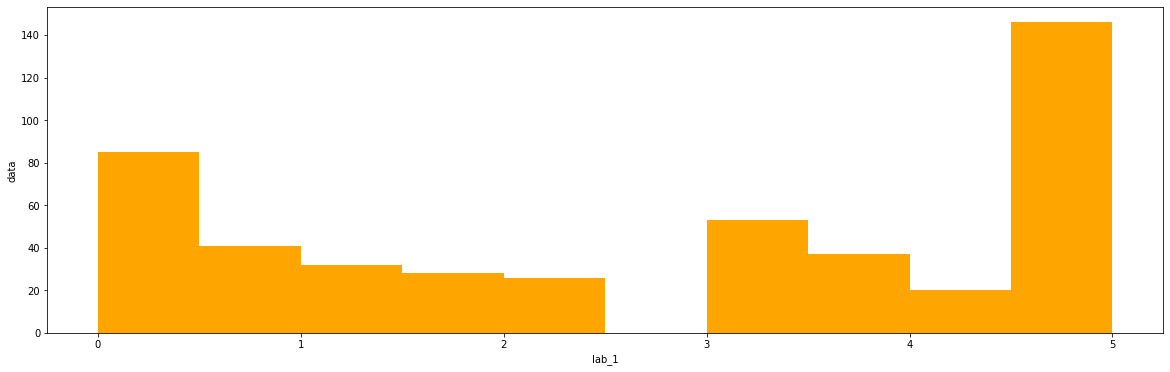

In [91]:
# Histograma laboratorios
plt.hist(data['lab_1'], color="orange")
plt.xlabel("lab_1")
plt.ylabel("data")
plt.show()


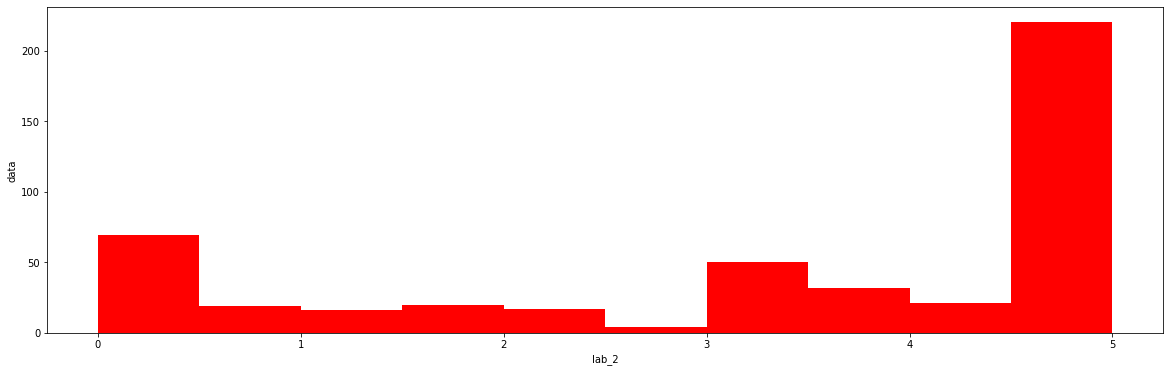

In [92]:
# Histograma laboratorios
plt.hist(data['lab_2'], color="red")
plt.xlabel("lab_2")
plt.ylabel("data")
plt.show()

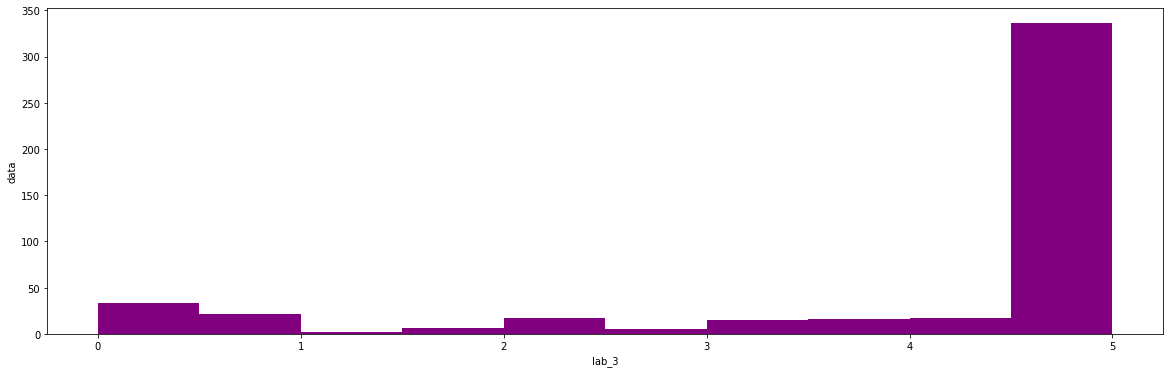

In [93]:
# Histograma laboratorios
plt.hist(data['lab_3'], color="purple")
plt.xlabel("lab_3")
plt.ylabel("data")
plt.show()

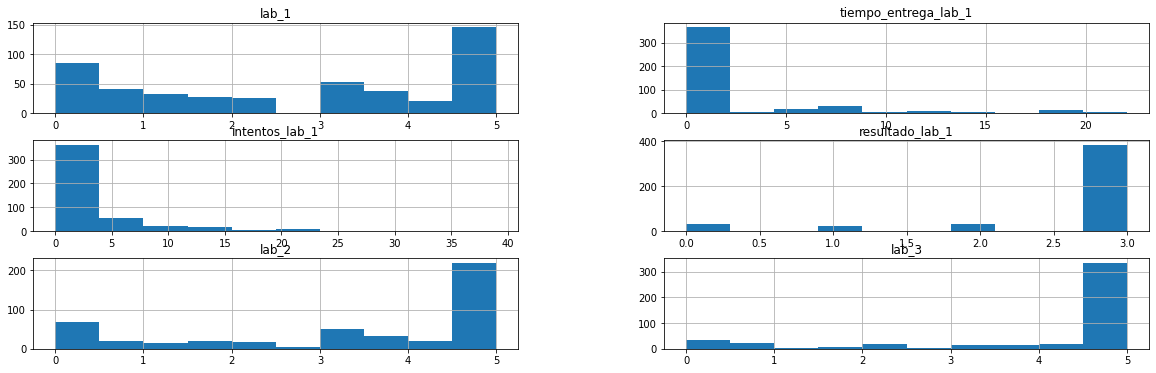

In [94]:
# Se genera el histograma de las características
data_histograma = data
data_histograma.drop(['grade'], axis=1).hist()
plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

In [95]:
# Se genera las estadísticas del DataFrame
data2.describe()

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000
mean,2.954000,2.202933,3.060000,2.621667,3.29350,4.044833,1.000000
std,1.854422,4.200492,4.514092,0.888733,1.83559,1.590888,0.817178
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.300000,1.000000,3.000000,1.60000,4.000000,0.000000
50%,3.550000,0.480000,1.000000,3.000000,4.00000,4.900000,1.000000
75%,4.700000,1.000000,3.000000,3.000000,4.90000,5.000000,2.000000
max,5.000000,22.080000,39.000000,3.000000,5.00000,5.000000,2.000000


In [96]:
# Se observa el tipo de datos de las columnas
data2.dtypes

lab_1                   float64
tiempo_entrega_lab_1    float64
intentos_lab_1            int64
resultado_lab_1           int64
lab_2                   float64
lab_3                   float64
grade                     int64
dtype: object

### ----------------------------------------

### Predicción con todas las características 

#### Se crea el set de entrenamiento y de pruebas

In [97]:
# Se definen los valores de las características	
features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']
			
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)

X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,
                                                     random_state= 6)


##### FIN CÓDIGO INSERTADO #####

#### Mejores características Eli5

In [98]:
# Se crea el modelo y se grafica el arbol de decision
dtc = DecisionTreeClassifier() 
  
# Se entrena el modelo
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)

##### INSERTE SU CÓDIGO AQUÍ #####
#aqui se colocan las caracteristias importantes de nuestro modelo y las evalua.

Best_features = pd.DataFrame({'feature':X_train.columns,'Relevantes':np.round(dtc.feature_importances_,3)})
Best_features = Best_features.sort_values('Relevantes',ascending=False).set_index('feature')
Best_features.head()

show_weights(dtc, feature_names = features)

##### FIN CÓDIGO INSERTADO #####

Weight,Feature
0.4414,lab_1
0.3555,lab_2
0.0703,lab_3
0.0685,resultado_lab_1
0.0402,tiempo_entrega_lab_1
0.0243,intentos_lab_1


### --------------------------------------------------------------------------

### Predicción con ajuste de Hiperparámetros (Grid Search)

In [99]:
# Se definen los valores de las características
features = ['lab_1','lab_2','resultado_lab_1']
# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     train_size= 0.8,
                                                     random_state= 6)

##### FIN CÓDIGO INSERTADO #####

#### Naive Bayes

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

# Parámetros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=0.0005336699231206307)
-----------------------------------------------------------
[[28 20  0]
 [ 6 29  7]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        48
           1       0.59      0.69      0.64        42
           2       0.81      1.00      0.90        30

    accuracy                           0.73       120
   macro avg       0.74      0.76      0.74       120
weighted avg       0.74      0.72      0.72       120

Precisión:  0.74
Recall:  0.72
F1-Score:  0.72


In [101]:
# Se crea el clasificador de tipo Naive Bayes
nb = GaussianNB()

# Se entrena el modelo
nb.fit(X_train, y_train)

# Se genera la predicción
prediccion = nb.predict(X_test)

#### SVM

In [102]:
##### INSERTE SU CÓDIGO AQUÍ #####

from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = SVC()

gamma =  [10]
C = [10]

grid = dict(gamma = gamma,
            C = C,
            )

# Parámetros

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))



Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[45  3  0]
 [ 5 35  2]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.92      0.83      0.88        42
           2       0.94      1.00      0.97        30

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Precisión:  0.92
Recall:  0.92
F1-Score:  0.92


#### Árbol de Decisión (DT)

In [103]:
##### INSERTE SU CÓDIGO AQUÍ #####

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb =  DecisionTreeClassifier()

max_depth=[20]
min_samples_leaf=[5]

grid = dict(max_depth = max_depth,
            min_samples_leaf = min_samples_leaf,
            )

# Parámetros

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))


##### FIN CÓDIGO INSERTADO #####

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters (GridSearch): DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)
-----------------------------------------------------------
[[41  7  0]
 [ 6 30  6]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.81      0.71      0.76        42
           2       0.83      1.00      0.91        30

    accuracy                           0.84       120
   macro avg       0.84      0.86      0.84       120
weighted avg       0.84      0.84      0.84       120

Precisión:  0.84
Recall:  0.84
F1-Score:  0.84


#### Bosque Aleatorio (RF)

In [125]:
##### INSERTE SU CÓDIGO AQUÍ #####

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb =   RandomForestClassifier()


# Parámetros
bootstrap=[False]
max_depth =  [20]
max_features=['log2']
min_samples_split = [10]
n_estimators=[5]

grid = dict(max_depth = max_depth,
           min_samples_split = min_samples_split,
           bootstrap=bootstrap,
           max_features=max_features,
           n_estimators=n_estimators
            )


# Parámetros

grid_search = GridSearchCV(estimator = nb, 
                           param_grid = grid, 
                           cv= 10, 
                           verbose=1,
                           n_jobs=-1,  
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))


##### FIN CÓDIGO INSERTADO #####

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters (GridSearch): RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2',
                       min_samples_split=10, n_estimators=5)
-----------------------------------------------------------
[[45  3  0]
 [ 5 36  1]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        48
           1       0.92      0.86      0.89        42
           2       0.97      1.00      0.98        30

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.92       120

Precisión:  0.93
Recall:  0.92
F1-Score:  0.92


### Gráfica de barras para la predicción

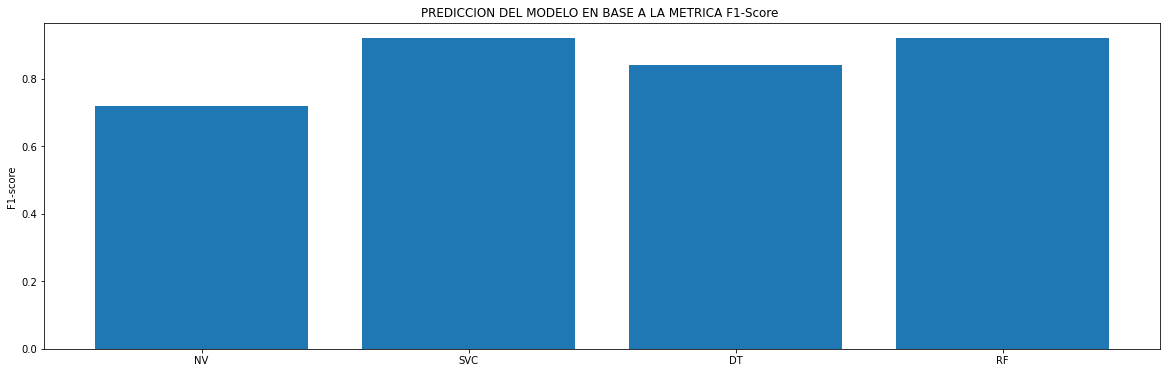

In [139]:
##### INSERTE SU CÓDIGO AQUÍ #####

ModelosdeP = ['NV', 'SVC', 'DT', 'RF']
ResultadoP = [0.72, 0.92, 0.84, 0.92]

fig, ax = plt.subplots()
#etiqueta en el eje Y
ax.set_ylabel('F1-score')
#etiqueta en el eje X
ax.set_title('PREDICCION DEL MODELO EN BASE A LA METRICA F1-Score ')
plt.bar(ModelosdeP, ResultadoP)
plt.savefig('barras_simple.png')
plt.show()


In [111]:
data2

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
1,3.3,0.33,1,3,3.3,3.7,1
4,4.2,0.50,10,3,3.1,4.9,1
5,0.0,1.58,6,3,4.5,5.0,1
6,3.1,1.12,4,3,4.8,5.0,1
11,3.1,0.25,1,3,5.0,5.0,1
...,...,...,...,...,...,...,...
304,4.7,0.34,6,3,3.4,4.6,2
215,5.0,0.92,3,3,4.0,4.9,2
238,5.0,7.07,2,3,2.1,4.7,2
33,4.9,0.42,1,3,3.3,4.9,2
